In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
# loading the data file and checking the first 5 columns
from google.colab import files
%matplotlib inline
from keras import layers
import keras
df = pd.read_csv('/content/drive/MyDrive/Dataset/IoT Intrusion detection/IoTID20.csv')

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225744,61326,68,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [ ]:
print(df.describe())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

        Destination Port   Flow Duration   Total Fwd Packets  \
count       225745.00000    2.257450e+05       225745.000000   
mean          8879.61946    1.624165e+07            4.874916   
std          19754.64740    3.152437e+07           15.422874   
min              0.00000   -1.000000e+00            1.000000   
25%             80.00000    7.118000e+04            2.000000   
50%             80.00000    1.452333e+06            3.000000   
75%             80.00000    8.805237e+06            5.000000   
max          65532.00000    1.199999e+08         1932.000000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            225745.000000                225745.000000   
mean                  4.572775                   939.463346   
std                  21.755356                  3249.403484   
min                   0.000000                     0.000000   
25%                   1.000000                    26.000000   
50%                   4.000000               

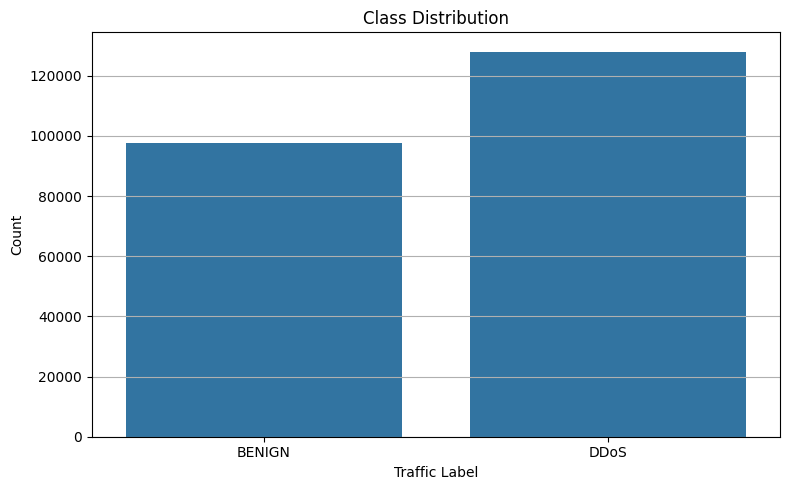

In [ ]:
df.columns = df.columns.str.strip()

# class distribution plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.xlabel('Traffic Label')
plt.ylabel('Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


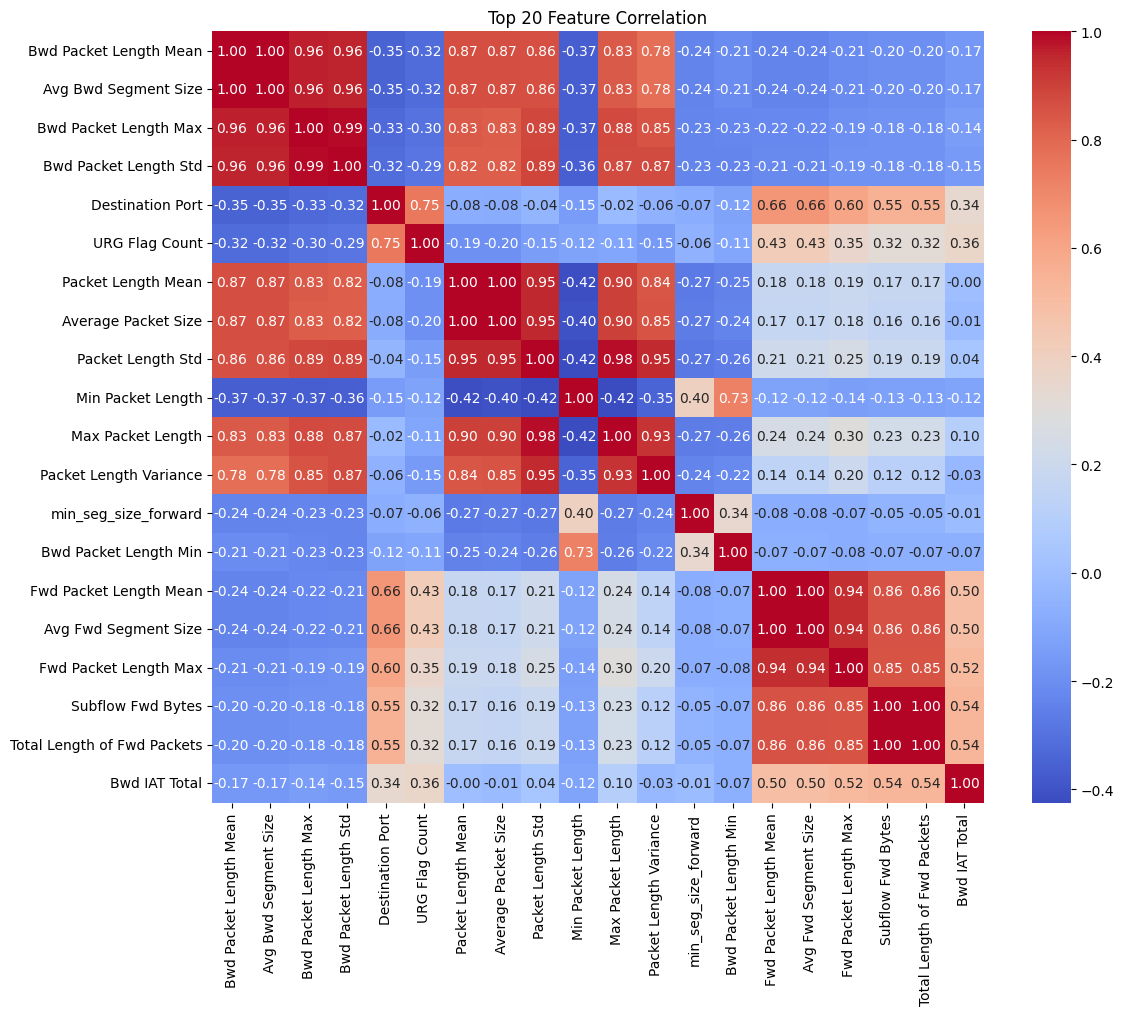

In [ ]:
# Compute correlation matrix for numeric features
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
df['Label_enc'] = df['Label'].astype('category').cat.codes

corr_with_label = df.corr(numeric_only=True)['Label_enc'].abs().sort_values(ascending=False)

# Get top 20 correlated features
top_features = corr_with_label[1:21].index

# Plot heatmap for top correlated features
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Top 20 Feature Correlation')
plt.tight_layout()
plt.show()


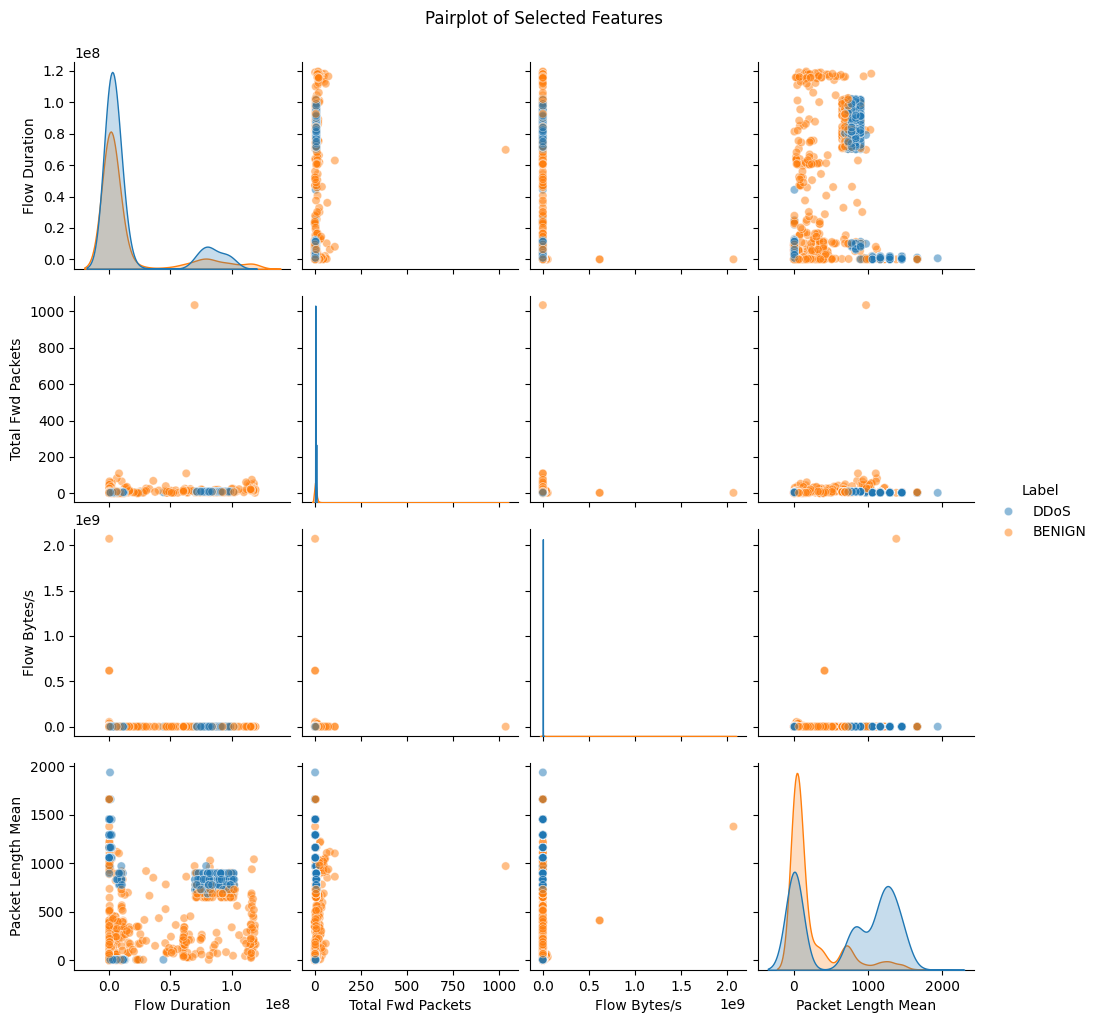

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load and prepare data
df = pd.read_csv('/content/drive/MyDrive/Dataset/IoT Intrusion detection/IoTID20.csv')
df.columns = df.columns.str.strip()
df['Label'] = df['Label'].astype(str)
df['Label_enc'] = LabelEncoder().fit_transform(df['Label'])

# Sample the data
df_sample = df.sample(n=5000, random_state=42)

# Selected features for pairplot
selected_features = ['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Packet Length Mean', 'Label']

# Pairplot
sns.pairplot(df_sample[selected_features], hue='Label', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


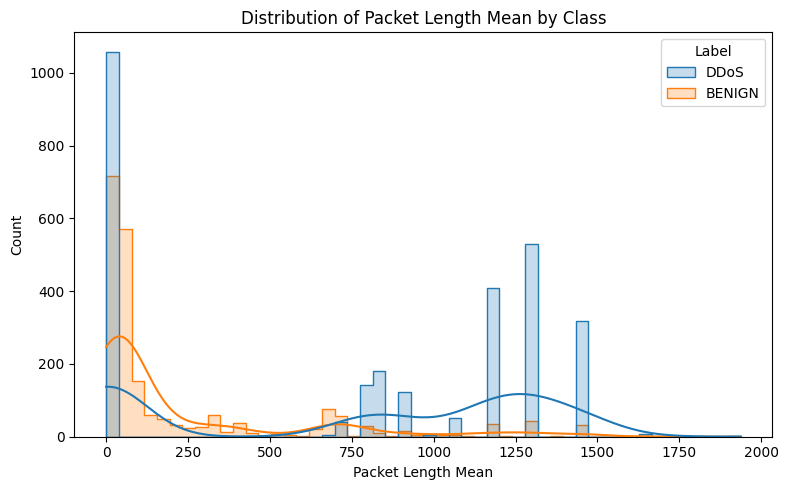

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Dataset/IoT Intrusion detection/IoTID20.csv')
df.columns = df.columns.str.strip()
df['Label_enc'] = LabelEncoder().fit_transform(df['Label'])

# Convert label column for visualization
df['Label'] = df['Label'].astype(str)

df_sample = df.sample(n=5000, random_state=42)

plt.figure(figsize=(8,5))
sns.histplot(data=df_sample, x='Packet Length Mean', hue='Label', kde=True, bins=50, element="step")
plt.title("Distribution of Packet Length Mean by Class")
plt.tight_layout()
plt.show()

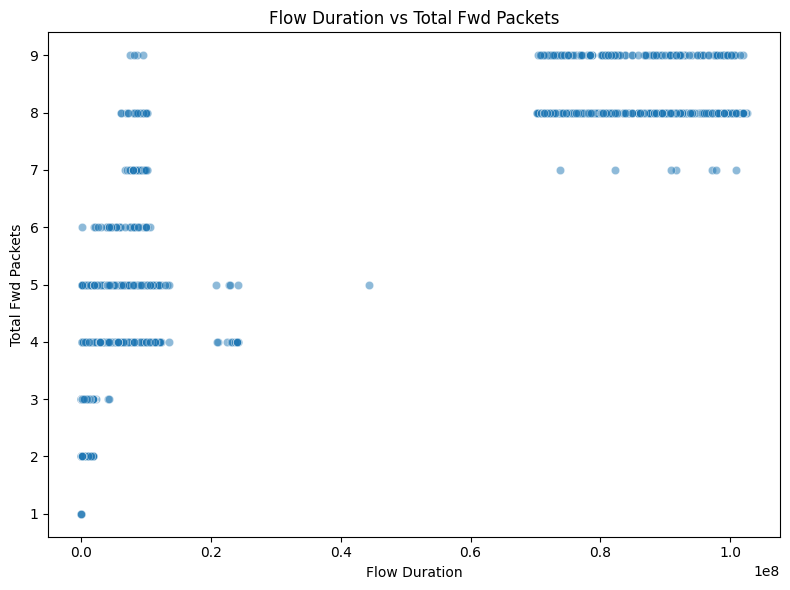

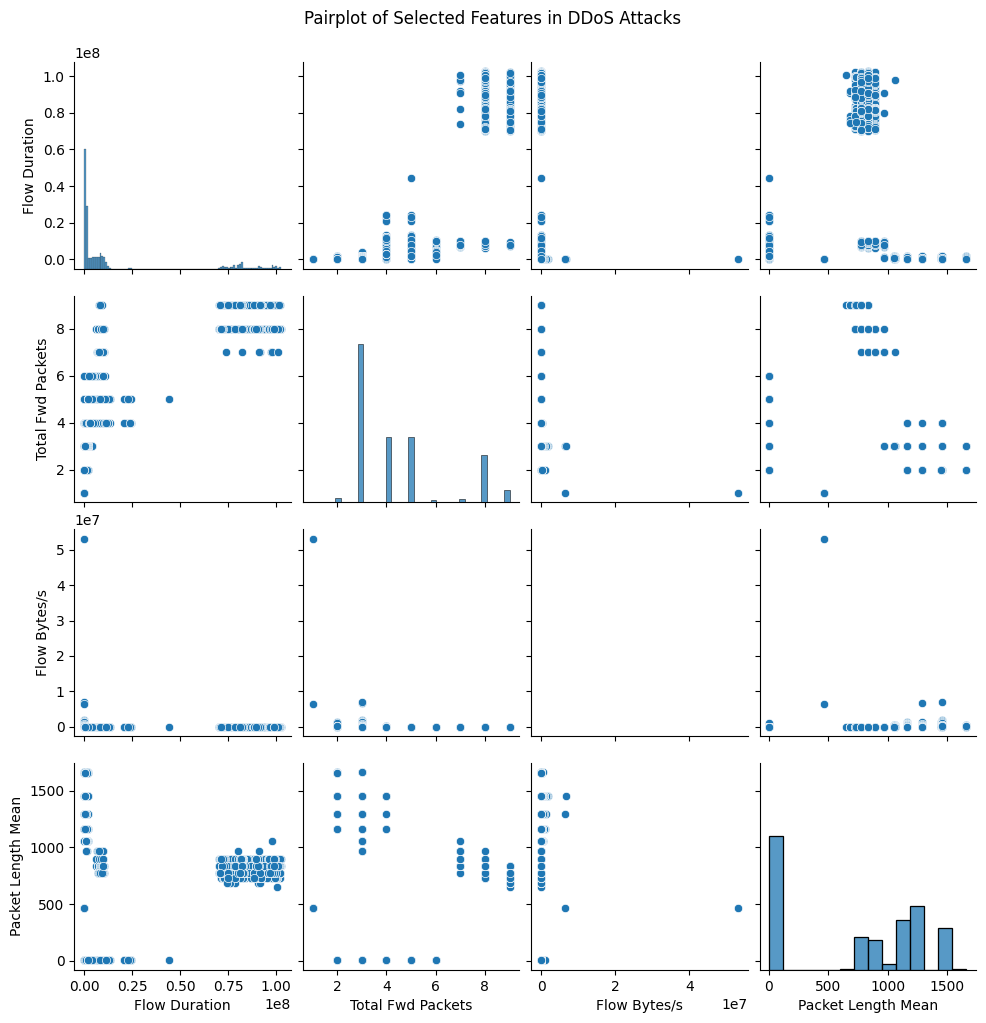

[18883, 18884, 18885, 18886, 18887, 18888, 18889, 18890, 18891, 18892]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/IoT Intrusion detection/IoTID20.csv')

df.columns = df.columns.str.strip()
df['Label_enc'] = LabelEncoder().fit_transform(df['Label'])

attack_df = df[df['Label'] == 'DDoS']

attack_sample = attack_df[['Flow Duration', 'Total Fwd Packets', 'Flow Bytes/s', 'Packet Length Mean']].sample(n=5000, random_state=42)

# 1. Scatter: Flow Duration vs Total Fwd Packets
plt.figure(figsize=(8,6))
sns.scatterplot(data=attack_sample, x='Flow Duration', y='Total Fwd Packets', alpha=0.5)
plt.title("Flow Duration vs Total Fwd Packets")
plt.xlabel("Flow Duration")
plt.ylabel("Total Fwd Packets")
plt.tight_layout()
plt.show()

# 2. Pairplot: Multiple Feature Relationships
sns.pairplot(attack_sample)
plt.suptitle("Pairplot of Selected Features in DDoS Attacks", y=1.02)
plt.show()

# 3. Attack indices (row numbers)
attack_indices = attack_df.index.tolist()
attack_indices[:10]


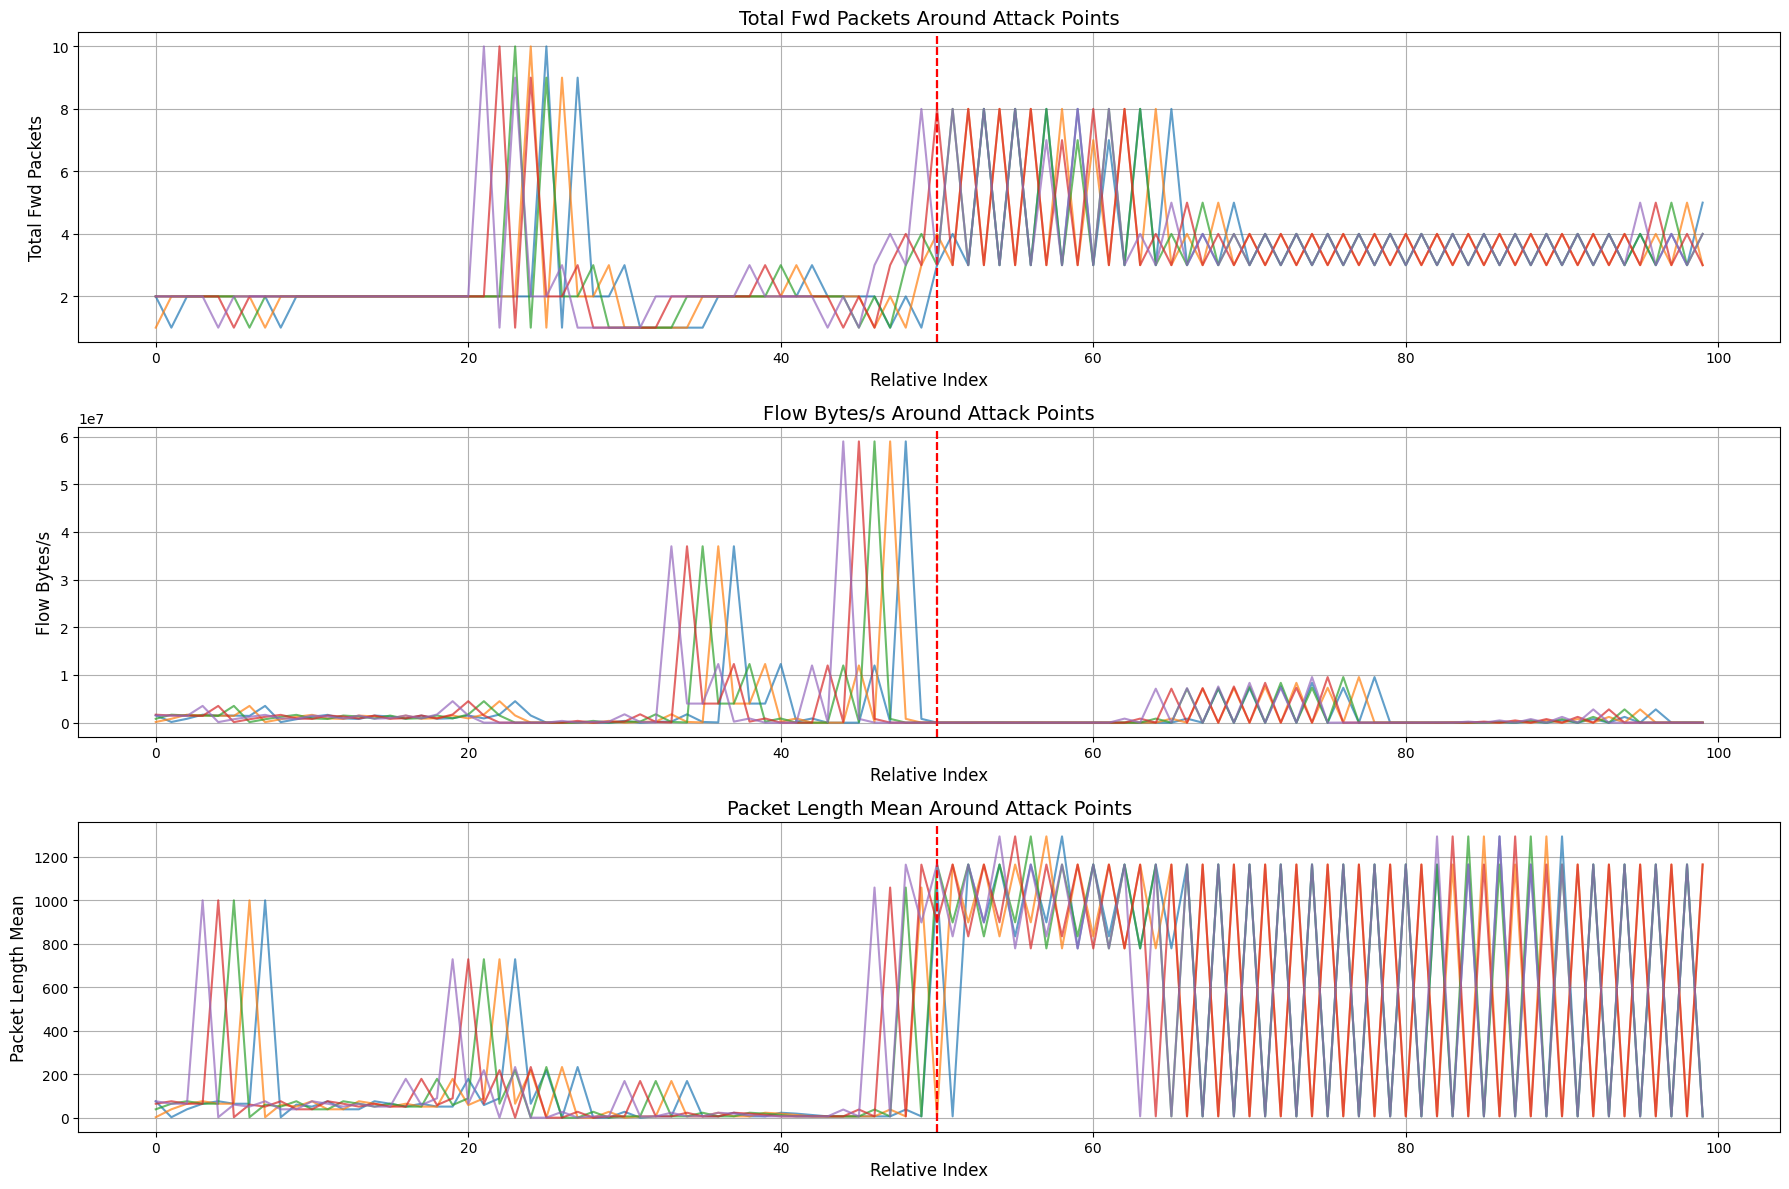

In [ ]:
import numpy as np

df.columns = df.columns.str.strip()

attack_indices = df[df['Label'] != 'BENIGN'].index.tolist()

# Take a manageable number of attack indices
selected_attacks = attack_indices[:5]

# Features to plot
features_to_plot = ['Total Fwd Packets', 'Flow Bytes/s', 'Packet Length Mean']

# Create the plot
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(len(features_to_plot), 1, i)

    # Plot a window around each attack index
    for attack_index in selected_attacks:
        start = max(0, attack_index - 50)
        end = min(len(df), attack_index + 50)
        plt.plot(df[feature][start:end].reset_index(drop=True), label=f'Attack at {attack_index}', alpha=0.7)
        plt.axvline(x=50, color='red', linestyle='--', alpha=0.6)

    plt.title(f"{feature} Around Attack Points", fontsize=14)
    plt.xlabel("Relative Index", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow scikit-learn imbalanced-learn --quiet


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Load and preprocess
df = pd.read_csv('/content/drive/MyDrive/Dataset/IoT Intrusion detection/IoTID20.csv')
df.columns = df.columns.str.strip()
df['Label_enc'] = LabelEncoder().fit_transform(df['Label'].astype(str))

features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
            'Flow Bytes/s', 'Flow Packets/s', 'Packet Length Mean',
            'Packet Length Std', 'Packet Length Variance']
df_clean = df[features + ['Label_enc']].replace([np.inf, -np.inf], np.nan).dropna()

X = df_clean[features]
y = df_clean['Label_enc']

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
input_dim = X.shape[1]
num_classes = y.nunique()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Mapping network
def build_mapping_network(latent_dim=100, dlatent_dim=128, num_layers=4):
    z = Input(shape=(latent_dim,))
    x = z
    for _ in range(num_layers):
        x = Dense(dlatent_dim, activation='relu')(x)
    return Model(z, x)

#  Generator
def build_generator(input_dim, dlatent_dim=128):
    style = Input(shape=(dlatent_dim,))
    x = Dense(128)(style)
    x = LeakyReLU(0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(input_dim, activation='tanh')(x)
    return Model(style, x)

#  Discriminator
def build_discriminator(input_dim, num_classes):
    inp = Input(shape=(input_dim,))
    x = Dense(256)(inp)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.3)(x)
    x = Dense(128)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.2)(x)
    out = Dense(num_classes, activation='softmax')(x)
    return Model(inp, out)

# Build networks
latent_dim = 100
mapping_net = build_mapping_network(latent_dim)
generator = build_generator(input_dim)
discriminator = build_discriminator(input_dim, num_classes)

discriminator.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# GAN training
epochs = 1000
batch_size = 64
for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_data = X_train[idx]
    real_labels = y_train.iloc[idx].values

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    style_vectors = mapping_net.predict(noise, verbose=0)
    fake_data = generator.predict(style_vectors, verbose=0)
    fake_labels = np.random.randint(0, num_classes, size=batch_size)

    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)

# Fine-tune
discriminator.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
discriminator.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1, validation_split=0.1)

# Prediction and metrics
y_pred = np.argmax(discriminator.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Precision    : {precision * 100:.2f}%")
print(f"Recall       : {recall * 100:.2f}%")
print(f"F1 Score     : {f1 * 100:.2f}%")


Epoch 1/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8289 - loss: 0.4055 - val_accuracy: 0.8316 - val_loss: 0.3900
Epoch 2/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8446 - loss: 0.3759 - val_accuracy: 0.8683 - val_loss: 0.3398
Epoch 3/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8528 - loss: 0.3623 - val_accuracy: 0.8719 - val_loss: 0.3383
Epoch 4/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8530 - loss: 0.3559 - val_accuracy: 0.8588 - val_loss: 0.3437
Epoch 5/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8558 - loss: 0.3494 - val_accuracy: 0.8665 - val_loss: 0.3349
Epoch 6/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8569 - loss: 0.3454 - val_accuracy: 0.8423 - val_loss: 0.3528
Epoch 7/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8560 - loss: 0.3476 - val_accuracy: 0.8721 - val_loss: 0.3162
Epoch 8/100
2540/2540 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8588 -

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = discriminator.predict(X_test)
if y_score.shape[1] == 1:
    y_score = y_score.ravel()
else:
    y_score = y_score[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'discriminator' is not defined